Imports.

In [84]:
%reload_ext autoreload
%autoreload 2

import rdkit
rdkit.Chem.Draw.IPythonConsole.ipython_maxProperties = -1

import os
import numpy as np
import dgym as dg
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Opening experimental results.

In [116]:
path = '../../dgym-data/analysis/out/'
files = os.listdir(path)

results = []
for file in files:
    if file.endswith('json'):
        result = json.load(open(path + file, 'r'))
        results.append(result[0])

df = pd.DataFrame(results)

Convert to ECDF.

In [127]:
def ecdf(costs):
    costs_sorted = np.sort(costs)
    probs = 1. * np.arange(1, len(costs) + 1) / len(costs)

    costs_sorted = [0.0, *costs_sorted]
    probs = [0.0, *probs]
    
    return costs_sorted, probs

data = pd.DataFrame()
# noises = np.arange(0, 2.1, 0.1)
noises = df['sigma'].unique()
for noise in noises:
    raw_costs = [r['cost'] for r in df.to_dict('records') if r['sigma'] == noise]
    cost, prob = ecdf(raw_costs)
    temp = pd.DataFrame({'cost': cost, 'prob': prob, 'noise': noise})
    data = pd.concat([data, temp])

Plot.

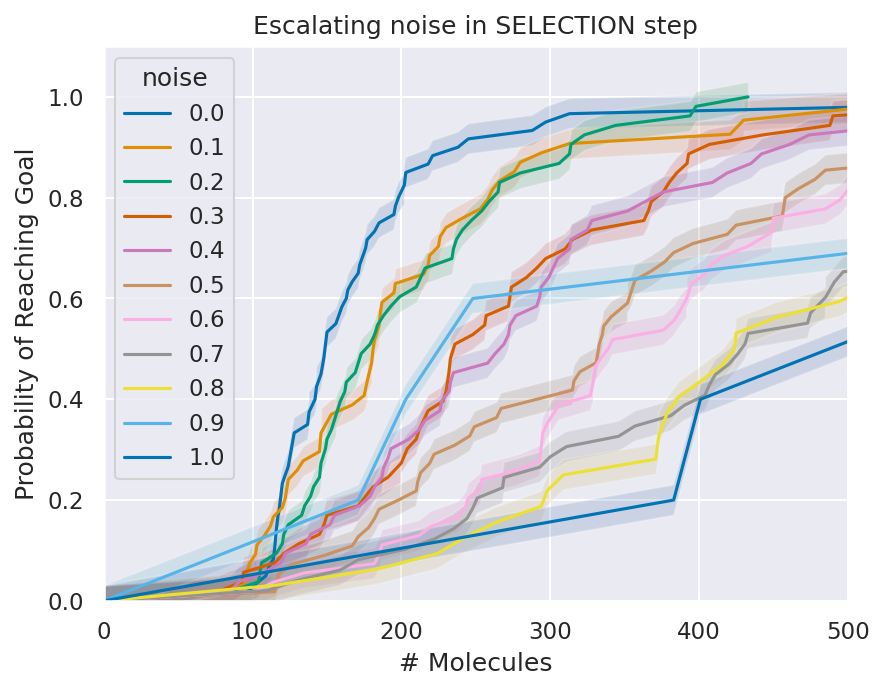

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
g = sns.lineplot(
    data,
    x='cost',
    y='prob',
    hue='noise',
    palette='colorblind',
    errorbar=None
)

g.set_title('Escalating noise in SELECTION step')
g.set_xlabel('# Molecules')
g.set_ylabel('Probability of Reaching Goal')
g.set_ylim([0, 1.1])
g.set_xlim(0, 500)

for name, group in data.groupby('noise'):

    g.fill_between(
        group['cost'],
        group['prob'] - 0.03,
        group['prob'] + 0.03,
        alpha=0.2
    )

plt.gcf().set_dpi(150)
plt.show()